<a href="https://colab.research.google.com/github/mostafa-ja/Machine-Learning-fall2023/blob/main/Linear_and_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Before you start:** Please read the ***Submission*** section at the bottom of the notebook carefully.

# Explanatory questions
Answer the following questions with the help of the material learned in the classroom and the introduced book:



1. What is a test set, and why whould you want to use it?

برای ارزیابی مدل در مواجهه با دیتاست جدیدی که ندیده است و تعمیم پذیری مدل را در برابر دیتای جدید نشان می دهد.


2. What is the porpuse of a validation test?

برای ارزیابی مدل در حین آموزش با توجه به تنظیمات ، هایپر پارامترهای مختلف و معماری متفاوت مدل است، تا بتوان به بهترین مدل و تنظیمات دست یافت.

3. What can go wrong if you tune hyperparameters using the test set?

با این کار مدل ما با دیتاست تست آشنا میشود و ارزیابی درستی از تعمیم پذیری مدل بر روی داده جدید نمی شود و احتمال بیش برازش افزایش پیدا می کند

# Machine Learning's "Hello World"!

This is the assignment **#1** of the **Machine Learning** graduate course at **Shahid Beheshti University - Fall 2023**

In this notebook, we explore the basic and traditional machine learning algorithms and see how to implement predictive models powered by [Sickit-Learn](https://scikit-learn.org/stable/) library.




In [1]:
# lets import the essential packages we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Medical Insurance Cost Prediction

Many factors that affect how much you pay for health insurance are not within your control. Nonetheless, it's good to have an understanding of what they are. Here are some factors that affect how much health insurance premiums cost:

- **age**: age of primary beneficiary
- **sex**: insurance contractor gender, female, male
- **bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight using the ratio of height to weight, ideally 18.5 to 24.9
- **smoker**: Smoking
- **children**: Number of children covered by health insurance / Number of dependents

In [2]:
df = pd.read_csv('datasets/insurance.csv')
print("Shape of the dataset: {}".format(df.shape))
df.head(5)

Shape of the dataset: (1338, 6)


,age,sex,bmi,children,smoker,charges
0,45,female,27.83,2,no,8515.7587
1,24,male,32.70,0,yes,34472.8410
2,34,female,29.26,3,no,6184.2994
3,64,male,34.50,0,no,13822.8030
4,27,female,24.10,0,no,2974.1260


There is a library named `pandas_profiling` in Python include a method named as `ProfileReport()` which generate a basic report on the input DataFrame. The report consist of the following:

- DataFrame overview,
- Each attribute on which DataFrame is defined,
- Correlations between attributes (Pearson Correlation and Spearman Correlation), and
- A sample of DataFrame.

By running the cell below, a HTML file will be created next to the notebook in the project directory.

In [1]:
!pip install -U ydata-profiling[notebook]==4.0.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.5/357.5 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.6/381.6 kB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 12.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 49.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 78.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 23.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27082 sha256=9e317695f61d0fee29c2c2fa4f4bfc13e3fdb8ae19dcede3fed4b6cbaab8af65
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
 

In [4]:
# import pandas_profiling library
import ydata_profiling as pp

# forming ProfileReport and save
# as a HTML file
profile = pp.ProfileReport(df)
profile.to_file("insurance_dataset_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
profile

## 1.1 Linear Regression

**Linear Regression** is a machine learning algorithm based on **supervised learning**. It performs a regression task. Regression models a target prediction value based on independent variables. It is mostly used for finding out the relationship between variables and forecasting.
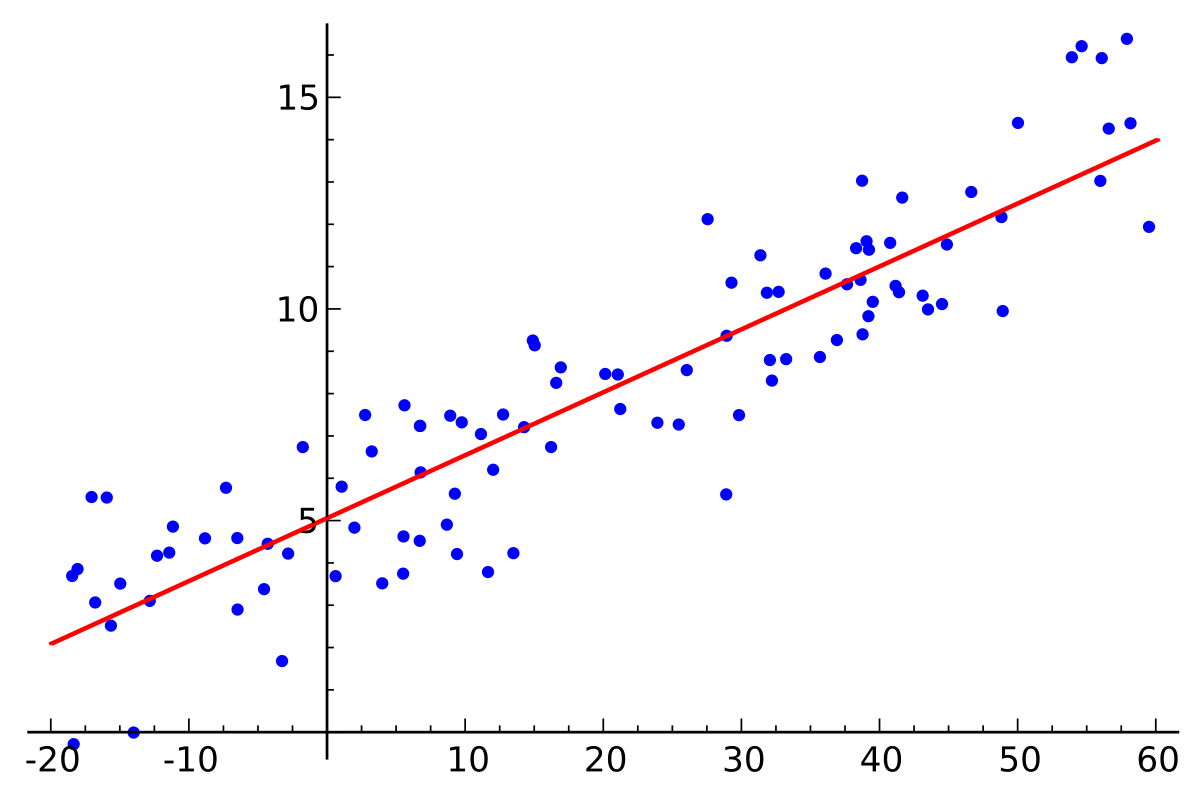

In this problem, we want to create a linear regression model for the existing dataest. For simplicity, we only consider one of the features of the data `bmi` and the target `charges`. Also we are just interested in the people who smokes. So:

Text(0, 0.5, 'charges')

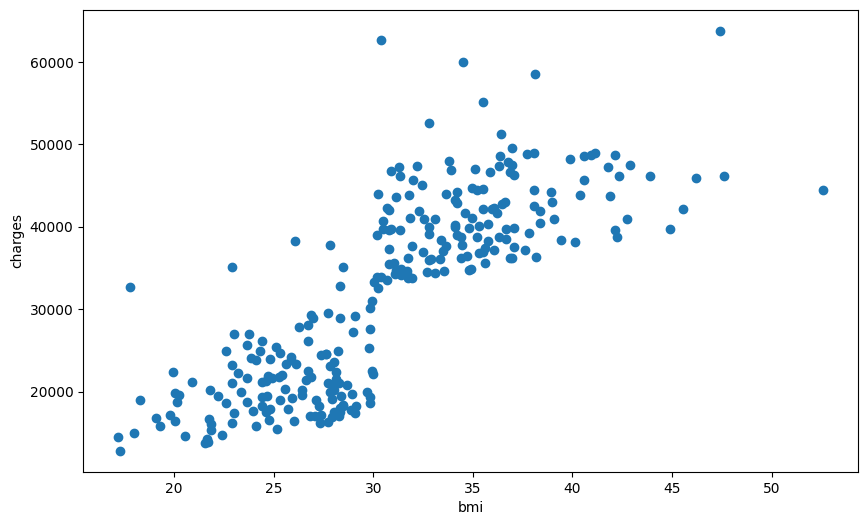

In [3]:
X = df[df['smoker'] =='yes']['bmi'].values  # X now is a numpy array
target = df[df['smoker'] =='yes']['charges'].values  # also target is a numpy array

# plot the points
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = X, y = target)
plt.xlabel("bmi")
plt.ylabel("charges")

## Q1. Implement `SimpleLinearRegression` class. (20 points)

Fill the blank lines with the least possible codes. Note that redundant codes may lead to reduce your score.

**Note**: Do not add any other functions to the class defined below.

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

class SimpleLinearRegression():
    def __init__(self):
        self.intercept = 0.0
        self.coeff = 0.0

    def train(self, X_train, y_train):
        # TODO: Thin function takes X_train: numpy.ndarray and y : numpy.ndarray
        # and fit a linear line to the points with the least loss
        # Use sklearn.linear_model.LinearRegression for this purpose
        # At last this function must set the intercept and coefficient of the predicted line

        intercept = 0.0
        coeff = 0.0
        ############# Your code here ############
        model = LinearRegression()
        model.fit(X_train, y_train)
        coeff = model.coef_
        intercept = model.intercept_
        #########################################

        self.intercept = intercept
        self.coeff = coeff

        return coeff, intercept

    def compute_loss(self, y_pred, y_true, loss_fn = 'MSE'):
        # TODO: Implement this function that takes y_pred and y_true
        # as a 1-dimensional numpy array (n_samples,) and returns
        # the loss using sklearn.metrics functions

        possible_loss_functions = ['MSE', 'MAE', 'R2_Score']

        loss = None
        if loss_fn == 'MSE':
            ############# Your code here ############
            loss = metrics.mean_squared_error(y_true, y_pred)
            #########################################
        elif loss_fn == 'MAE':
            ############# Your code here ############
            loss = metrics.mean_absolute_error(y_true, y_pred)
            #########################################
        elif loss_fn == 'R2_Score':
            ############# Your code here ############
            loss = metrics.r2_score(y_true, y_pred)
            #########################################
        else:
            error_str = 'Loss function is either unknown or not implemented.'
            raise NotImplementedError(error_str)

        return loss

    def normalize(self, X, normalization='Standardization'):
        # TODO: Implement this function that takes X : numpy.ndarray
        # as the input feature array and normalize it
        # You can use sklearn.preprocessing normalizations functions too.
        # NOTE: For test set, you must use the mean and std of train set (standardization)
        # of the train set. (since test set has not seen so far)
        possible_normalization = ['Standardization', 'MinMaxScaling']

        nomalaized_feat = None
        if normalization == 'Standardization':
            ############# Your code here ############
            scaler = StandardScaler()
            nomalaized_feat = scaler.fit_transform(X)
            #########################################
        elif normalization == 'MinMaxScaling':
            ############# Your code here ############
            scaler = MinMaxScaler()
            nomalaized_feat = scaler.fit_transform(X)
            #########################################
        else:
            error_str = 'Normalization type is either unknown or not implemented.'
            raise NotImplementedError(error_str)

        return scaler, nomalaized_feat

    def prepare_dataset(self, X, y, test_size=0.2, random_state=42):
        # TODO: Implement this function that takes X : numpy.ndarray and y : numpy.ndarray
        # and use sklearn.model_selection.train_test_split to split your data into test and train sets
        X_train, y_train, X_test, y_test = None, None, None, None
        ############# Your code here ############
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
        X_train = X_train.reshape(-1,1)
        y_train = y_train.reshape(-1,1)
        X_test = X_test.reshape(-1,1)
        y_test = y_test.reshape(-1,1)
        #########################################

        return X_train, y_train, X_test, y_test

## Q2. What are the coefficient and intercept of the trained linear model? (5 points)

After completing the functions above, use them to report the final coefficient and intercept of the predicted model.

**Note**: When implementing the `SimpleLinearRegression` class, notice that before training your model, normalize your input features for better convergence by completeing `normalize()` function. If you forget it, it may hurts your model consequently!

In [175]:
slr = SimpleLinearRegression()
############# Your code here ############
X_train, y_train, X_test, y_test = slr.prepare_dataset(X, target, test_size=0.2, random_state=42)
norm_scaler, X_train_normalized = slr.normalize(X_train, normalization='Standardization')
coeff, intercept = slr.train(X_train_normalized, y_train)
print("Intercept  : {:.4f}".format(intercept[0]))
print("Coefficient: {:.4f}".format(coeff[0][0]))
#########################################

Intercept  : 32001.6709
Coefficient: 9339.0975


## Q3. Plot the prediceted line and the data points. (5 points)

- Use `plt.scatter` to indicate the data points (Blue points for Train set and Red points for Test set).
- Plot the predicted line using the coefficient and intercept calculated in the previous question. (`plt.plot`)

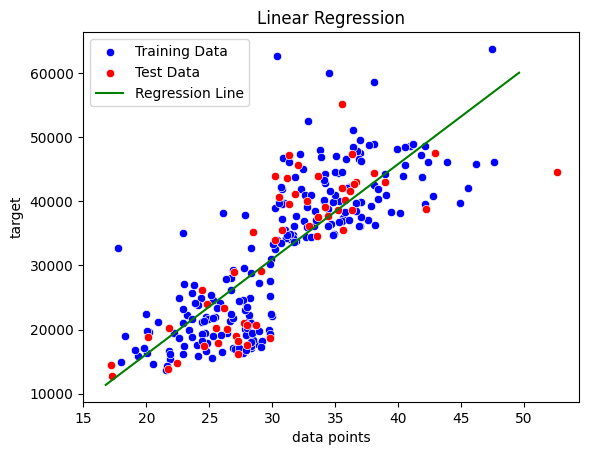

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot using Seaborn
sns.scatterplot(x=X_train[:,0], y=y_train[:,0], color='blue', label='Training Data')
sns.scatterplot(x=X_test[:,0], y=y_test[:,0], color='red', label='Test Data')

# Plotting the regression line for training data
X_range = np.linspace(min(X_train)-1, max(X_train)+2, 100)
X_range_normalized = norm_scaler.transform(X_range)
plt.plot(X_range, coeff * X_range_normalized + intercept, color='green', label='Regression Line')

# Labeling axes and adding legend
plt.xlabel('data points')
plt.ylabel('target')
plt.title('Linear Regression')
plt.legend()

# Displaying the plot
plt.show()

## Q4. Compute loss. (5 points)

First you must search about the following loss functions and compare them. (By showing their benefits to each other).

- **MSE**: Mean Squared Error
- **MAE**: Mean Absolute Error
- **R2-score**

Then create a DataFrame similar to the table shown below:

| loss_function | train_set | test_set |
| --- | --- | --- |
| MSE | ... | ... |
| MAE | ... | ... |
| R2-score | ... | ... |

In [86]:
############# Your code here ############

# Calculate predictions for train and test sets
y_pred_train = coeff * X_train + intercept
y_pred_test = coeff * X_test + intercept

# Define a list of loss functions
loss_functions = ['MSE', 'MAE', 'R2_Score']

# Calculate loss metrics for train and test sets
train_losses = [slr.compute_loss(y_pred_train, y_train, loss_fn=loss) for loss in loss_functions]
test_losses = [slr.compute_loss(y_pred_test, y_test, loss_fn=loss) for loss in loss_functions]

# Create a DataFrame to store loss metrics
loss_df = pd.DataFrame({
    'loss_function': loss_functions,
    'train_set': train_losses,
    'test_set': test_losses
}).set_index('loss_function')

# Display the DataFrame
loss_df

#########################################

,train_set,test_set
loss_function,,
MSE,4.578882e+07,4.884309e+07
MAE,5.146869e+03,5.379705e+03
R2_Score,6.557427e-01,6.286655e-01


## 1.2 Underfitting & Overfitting Issues

A model is said to be a good machine learning model if it generalizes any new input data from the problem domain in a proper way. This helps us to make predictions in the future data, that the data model has never seen. Now, suppose we want to check how well our machine learning model learns and generalizes to the new data (Test set). For that, we have overfitting and underfitting, which are majorly responsible for the poor performances of the machine learning algorithms.

- **Underfitting:** A statistical model or a machine learning algorithm is said to have underfitting when it cannot capture the underlying trend of the data. (It’s just like trying to fit undersized pants!) Underfitting destroys the accuracy of our machine learning model. Its occurrence simply means that our model or the algorithm **does not fit the data well enough**. It usually happens when we have fewer data to build an accurate model and also when we try to build a linear model with fewer non-linear data. In such cases, the rules of the machine learning model are too easy and flexible to be applied on such minimal data and therefore the model will probably make a lot of wrong predictions. Underfitting can be avoided by using more data and also reducing the features by feature selection.

    Techniques to reduce underfitting:

    1. Increase model complexity
    2. Increase the number of features, performing feature engineering
    3. Remove noise from the data.
    4. Increase the number of epochs or increase the duration of training to get better results.
    
    
- **Overfitting:** A statistical model is said to be overfitted when we train it with a lot of data (just like fitting ourselves in oversized pants!). When a model gets trained with so much data, it starts learning from the noise and inaccurate data entries in our data set. Then the model does not categorize the data correctly, because of too many details and noise. The causes of overfitting are the non-parametric and non-linear methods because these types of machine learning algorithms have more freedom in building the model based on the dataset and therefore they can really build unrealistic models.

    Techniques to reduce overfitting:

    1. Increase training data.
    2. Reduce model complexity.
    3. Early stopping during the training phase (have an eye over the loss over the training period as soon as loss begins to increase stop training).
    4. Ridge Regularization and Lasso Regularization
    
    In the image below you can see linear regression and polynomial regression models. In the linear model, the model has underfitted and thus it cannot be generalized on all the data point properly (Underfitting). So we can add polynomial features as well to increase the complexity of the model. Therefore, in the middle figure you can see better fittnes of the model on the data points by adding $\{x^2, x^3, x^4\}$ to our hypothesis space.
Although in the right side figure you see less loss than others, but the model is overfitted. It cannot be generalized on the test set (unseen data).
    
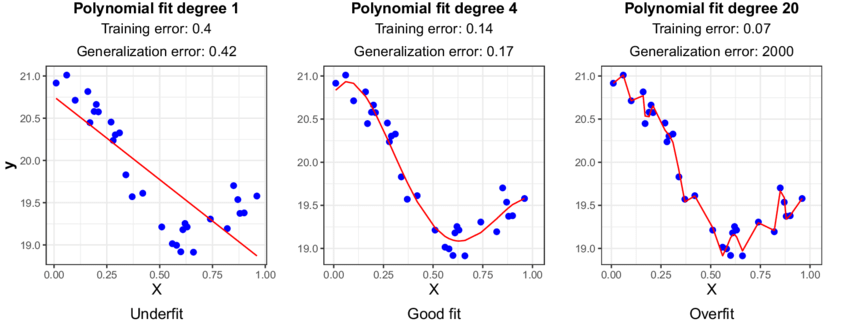


**Note:** The image above is not related to the given `insurance.csv` dataset.

## Q5. Implement `PolynomialRegression` class. (15 points)

Fill the blank lines with using the least possible codes. Note that redundant codes may lead to reduce your score.

**Note**: Do not add any other functions to the class defined below.

In [209]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics


class PolynomialRegression():
    def __init__(self, degree=3):
        self.degree = degree

    def train(self, X_train, y_train):
        # TODO: Thin function takes X_train: numpy.ndarray and y : numpy.ndarray
        # and fit a linear line to the points with the least loss
        # Use sklearn.linear_model.LinearRegression for this purpose
        # At last this function must set the intercept and coefficient of the predicted line

        intercept = None
        coeff = None
        ############# Your code here ############

        model = LinearRegression()
        model.fit(X_train, y_train)

        coeff = model.coef_
        intercept = model.intercept_

        #########################################

        return coeff, intercept

    def compute_loss(self, y_pred, y_true, loss_fn = 'MSE'):
        # TODO: Implement this function that takes y_pred and y_true
        # as a 1-dimensional numpy array (n_samples,) and returns
        # the loss using sklearn.metrics functions

        possible_loss_functions = ['MSE', 'MAE', 'R2_Score']

        loss = None
        if loss_fn == 'MSE':
            ############# Your code here ############
            loss = metrics.mean_squared_error(y_true, y_pred)
            #########################################
        elif loss_fn == 'MAE':
            ############# Your code here ############
            loss = metrics.mean_absolute_error(y_true, y_pred)
            #########################################
        elif loss_fn == 'R2_Score':
            ############# Your code here ############
            loss = metrics.r2_score(y_true, y_pred)
            #########################################
        else:
            error_str = 'Loss function is either unknown or not implemented.'
            raise NotImplementedError(error_str)

        return loss

    def normalize(self, X, normalization='Standardization'):
        # TODO: Implement this function that takes X : numpy.ndarray
        # as the input feature array and normalize it
        # You can use sklearn.preprocessing normalizations functions too.
        # NOTE: For test set, you must use the mean and std of train set (standardization)
        # of the train set. (since test set has not seen so far)
        possible_normalization = ['Standardization', 'MinMaxScaling']

        nomalaized_feat = None
        if normalization == 'Standardization':
            ############# Your code here ############
            scaler = StandardScaler()
            nomalaized_feat = scaler.fit_transform(X)
            #########################################
        elif normalization == 'MinMaxScaling':
            ############# Your code here ############
            scaler = MinMaxScaler()
            nomalaized_feat = scaler.fit_transform(X)
            #########################################
        else:
            error_str = 'Normalization type is either unknown or not implemented.'
            raise NotImplementedError(error_str)

        return scaler, nomalaized_feat

    def generate_polynomial_features(self, X):
        # TODO: Implement this function that takes degree: int and X: numpy.ndarray
        # to return polnomial features of those input features.
        # Use sklearn.preprocessing.PolynomialFeatures. Read its documentation for more info.
        X_pol = None
        ############# Your code here ############

        poly_features = PolynomialFeatures(degree=self.degree)
        X_pol = poly_features.fit_transform(X)

        #########################################

        return X_pol


    def prepare_dataset(self, X, y, test_size=0.2, random_state=42):
        # TODO: Implement this function that takes X : numpy.ndarray and y : numpy.ndarray
        # and use sklearn.model_selection.train_test_split to split your data into test and train sets
        X_train, y_train, X_test, y_test = None, None, None, None
        ############# Your code here ############

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
        X_train = X_train.reshape(-1,1)
        y_train = y_train.reshape(-1,1)
        X_test = X_test.reshape(-1,1)
        y_test = y_test.reshape(-1,1)

        #########################################

        return X_train, y_train, X_test, y_test

## Q6. Find the best polynomial degree. (10 points)

The best polynomial degree is the one with the least loss for test set data points. So use the implemented `PolynomialRegression`above multiple times to find the best one.

In [225]:
best_degree = 1
least_loss = float('inf')  # Initialize least_loss with infinity

for degree in range(20):
    pr = PolynomialRegression(degree=degree)
    X_train, y_train, X_test, y_test = pr.prepare_dataset(X, target, test_size=0.2, random_state=42)

    # Generating and normalizing polynomial features for train and test sets
    X_train_pol = pr.generate_polynomial_features(X_train)
    X_test_pol = pr.generate_polynomial_features(X_test)

    norm_scaler, X_train_pol_normalized = pr.normalize(X_train_pol, normalization='Standardization')
    X_test_pol_normalized = norm_scaler.transform(X_test_pol)

    # Training the model
    coeff, intercept = pr.train(X_train_pol_normalized, y_train)

    # Predictions and loss calculation
    y_pred = np.dot(X_test_pol_normalized, coeff.T) + intercept
    MSE = pr.compute_loss(y_pred, y_test, loss_fn='MSE')
    MAE = pr.compute_loss(y_pred, y_test, loss_fn='MAE')
    R2_Score = pr.compute_loss(y_pred, y_test, loss_fn='R2_Score')

    print('*********************************')
    print('Degree  :', degree)
    print("MSE     : {:.4f}".format(MSE))
    print("MAE     : {:.4f}".format(MAE))
    print("R2_Score: {:.4f}".format(R2_Score))

    if MSE < least_loss:
        least_loss = MSE
        best_degree = degree

print()
print('-----------------------------------')
print("Least loss(MSE) is in Degree {} with value {:.4f}".format(best_degree, least_loss))


*********************************
Degree  : 0
MSE     : 131592472.8872
MAE     : 10481.2501
R2_Score: -0.0004
*********************************
Degree  : 1
MSE     : 48843093.9324
MAE     : 5379.7045
R2_Score: 0.6287
*********************************
Degree  : 2
MSE     : 43886806.6902
MAE     : 5233.6752
R2_Score: 0.6663
*********************************
Degree  : 3
MSE     : 45721014.2182
MAE     : 5157.0211
R2_Score: 0.6524
*********************************
Degree  : 4
MSE     : 51012032.2812
MAE     : 5268.7232
R2_Score: 0.6122
*********************************
Degree  : 5
MSE     : 254342607.7226
MAE     : 6694.8814
R2_Score: -0.9337
*********************************
Degree  : 6
MSE     : 91171569.7653
MAE     : 5556.5607
R2_Score: 0.3069
*********************************
Degree  : 7
MSE     : 425099758.1314
MAE     : 7437.7009
R2_Score: -2.2319
*********************************
Degree  : 8
MSE     : 18311101244.8458
MAE     : 23361.2344
R2_Score: -138.2120
***********************

## Q7. Plot some experimental results (5 points)

Use `plt.subplot` to plot the predicted polynomial model **for degrees, 1, 4 and 20**.

So note that you must present 1 figure with 3 plots.

Also consider these:
- Set the title of each plot to ***Polynomial Fit degree i***
- Print loss of each model on both train and test set.

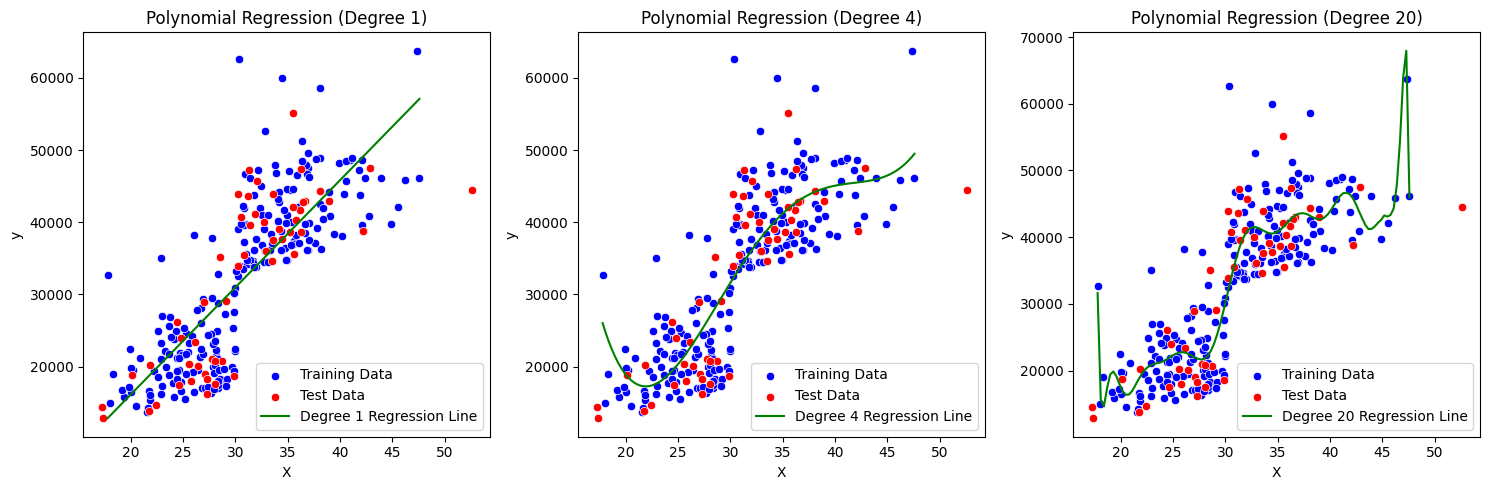

In [227]:
# Degrees for polynomial regression
degrees = [1, 4, 20]

plt.figure(figsize=(15, 5))

for i, degree in enumerate(degrees, 1):
    # Creating and fitting Polynomial Regression model for each degree
    pr = PolynomialRegression(degree=degree)
    X_train, y_train, X_test, y_test = pr.prepare_dataset(X, target, test_size=0.2, random_state=42)

    # Generating polynomial features for train and test sets
    X_train_pol = pr.generate_polynomial_features(X_train)
    X_test_pol = pr.generate_polynomial_features(X_test)

    # Normalizing data using the same scaler for train and test
    norm_scaler = StandardScaler()
    X_train_pol_normalized = norm_scaler.fit_transform(X_train_pol)
    X_test_pol_normalized = norm_scaler.transform(X_test_pol)

    # Training the model
    coeff, intercept = pr.train(X_train_pol_normalized, y_train)

    # Generating a range of X values for plotting the regression line
    X_range = np.linspace(min(X_train), max(X_train), 100)
    X_range_pol = pr.generate_polynomial_features(X_range)
    X_range_pol_normalized = norm_scaler.transform(X_range_pol)
    y_range_pred = np.dot(X_range_pol_normalized, coeff.T) + intercept

    # Creating subplot for each degree
    plt.subplot(1, len(degrees), i)
    sns.scatterplot(x=X_train[:,0], y=y_train[:,0], color='blue', label='Training Data')
    sns.scatterplot(x=X_test[:,0], y=y_test[:,0], color='red', label='Test Data')
    plt.plot(X_range, y_range_pred, color='green', label=f'Degree {degree} Regression Line')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(f'Polynomial Regression (Degree {degree})')
    plt.legend()

plt.tight_layout()
plt.show()



# Submission

Please read the notes here carefully:

    The more beautiful and insightfull your plots and diagrams are, the more points you get. So please take your time and concentration to prepare a good report with nice diagrams.

    The file you upload must be named as [Student ID]-[Your name].zip and it must contain only 1 file:

    Linear_and_Logistic_Regression.ipynb

    Important Note: The outputs of the code blocks must be remained in your notebook, otherwise, you definitly lose all the points of that

In case you have any questions, contact @Taraa_brn or @Haanieh97.
